In [1]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Data analysis
import pandas as pd
import numpy as np

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# For Plotting ROCs
def plot_roc(labels, prediction_scores):
    '''
    Creates a plot of the Recieving Opering Characteristics (ROC) Curve
    using the labels and predictions generated by the classifier.
    AOC is the Area under the curve.
    '''
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}'.format(auc)
    plt.figure(figsize = (12,8))
    plt.plot([0,1],[0,1],'--', color='gray', label='Chance')
    plt.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC for Model Performance')
    plt.tight_layout()
    plt.show()

In [3]:
df = pd.read_csv('cardiac_resume_cpet_df.csv')

# Reordering the DF and dropping the unneed variables
df = df[['sex', 'age', 'BMI', 'MaxVO2_EST', 'PeakHeartRate', 'DiffPeakVO2','HRvsVO2Slope', 'CardiacLim']]
df.head(3)

sex  age        BMI  MaxVO2_EST  PeakHeartRate  DiffPeakVO2  HRvsVO2Slope  \
0   F   40  35.915381    2.320385          142.0     0.586039     41.903391   
1   M   69  35.057157    2.658190          158.0     1.125139     62.785696   
2   F   16  19.135218    1.445030          201.0    -1.777328     37.936437   

   CardiacLim  
0           1  
1           1  
2           0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            137 non-null    object 
 1   age            137 non-null    int64  
 2   BMI            137 non-null    float64
 3   MaxVO2_EST     137 non-null    float64
 4   PeakHeartRate  137 non-null    float64
 5   DiffPeakVO2    137 non-null    float64
 6   HRvsVO2Slope   137 non-null    float64
 7   CardiacLim     137 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 8.7+ KB


In [5]:
df.describe()

age         BMI  MaxVO2_EST  PeakHeartRate  DiffPeakVO2  \
count  137.000000  137.000000  137.000000     137.000000   137.000000   
mean    53.080292   28.371275    2.251100     153.693431    -0.081151   
std     16.144594    6.326773    0.554647      27.851381     5.731279   
min     15.000000   17.781971    1.041994      83.000000   -65.937148   
25%     45.000000   24.074074    1.865856     138.000000    -0.008823   
50%     55.000000   27.236309    2.252537     154.000000     0.443716   
75%     65.000000   32.070312    2.646279     175.000000     0.891297   
max     85.000000   52.647234    3.744147     218.000000     2.236158   

       HRvsVO2Slope  CardiacLim  
count    137.000000  137.000000  
mean      53.653906    0.335766  
std       31.323345    0.473991  
min      -40.216251    0.000000  
25%       37.472129    0.000000  
50%       47.406264    0.000000  
75%       62.361696    1.000000  
max      215.424504    1.000000

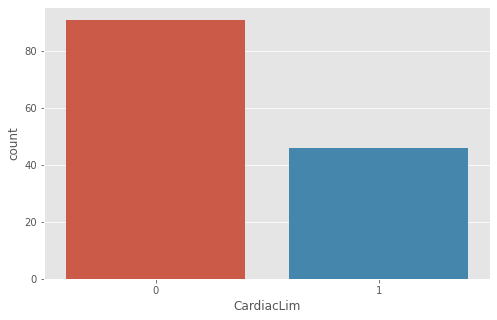

In [6]:
# Count Plot - Fairly even
plt.figure(figsize = (8,5))
sns.countplot(x='CardiacLim', data=df)

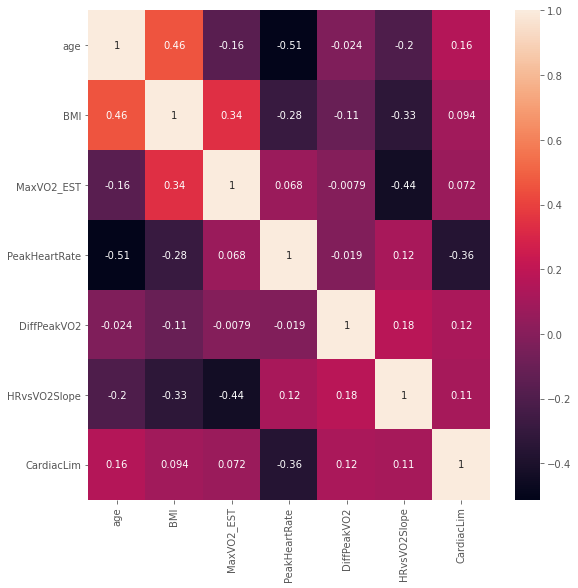

In [7]:
# Correlation Plot - Validates that 7 and 8 are the same
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap='rocket')

In [8]:
# Unique entries by variable - all look continuous except sex
for i in df.columns:
    print(i, 'number of unique entries:', len(df[i].unique()))

sex number of unique entries: 2
age number of unique entries: 58
BMI number of unique entries: 131
MaxVO2_EST number of unique entries: 130
PeakHeartRate number of unique entries: 77
DiffPeakVO2 number of unique entries: 137
HRvsVO2Slope number of unique entries: 137
CardiacLim number of unique entries: 2


In [9]:
df.columns

Index(['sex', 'age', 'BMI', 'MaxVO2_EST', 'PeakHeartRate', 'DiffPeakVO2',
       'HRvsVO2Slope', 'CardiacLim'],
      dtype='object')

In [10]:
# Getting Dummies and combining frames
sex = pd.get_dummies(df['sex'], prefix='sex')

frames = [df, sex]

# Converting Sales and Salary to Numerical Values 
result = pd.concat(frames, axis=1, sort=False)

# Reordering
result = result[['sex_F', 'sex_M', 'age', 'BMI', 'MaxVO2_EST', 'PeakHeartRate', 'DiffPeakVO2', 'HRvsVO2Slope', 'CardiacLim']]

result.head(3)

sex  age        BMI  MaxVO2_EST  PeakHeartRate  DiffPeakVO2  HRvsVO2Slope  \
0   F   40  35.915381    2.320385          142.0     0.586039     41.903391   
1   M   69  35.057157    2.658190          158.0     1.125139     62.785696   
2   F   16  19.135218    1.445030          201.0    -1.777328     37.936437   

   CardiacLim  sex_F  sex_M  
0           1      1      0  
1           1      0      1  
2           0      1      0

In [18]:
# result.head(3)

In [13]:
# ML Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
# result.columns

In [15]:
# Dividing into X and Y 
X = result.drop('CardiacLim', axis=1)
y = result['CardiacLim']

# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## KNN Attempt

In [20]:
# Standardizing the variables, a key step in KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Importing/Instantiating the variable (with K = 1)
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

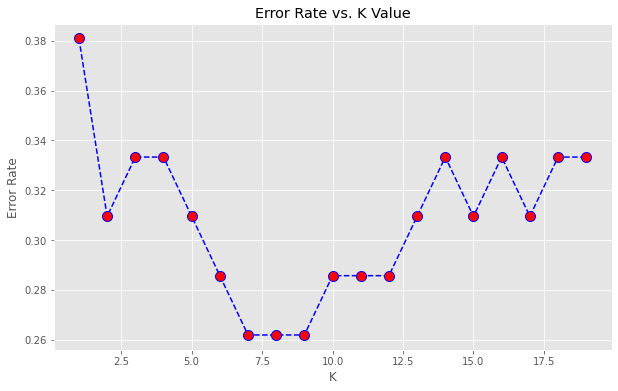

In [23]:
error_rate = []

# Looping over values of K (1 - 20)
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
# Building the model
knn = KNeighborsClassifier(n_neighbors=7)

# Fitting
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

# Making the classification report
print('Classification Report:')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.96      0.83        27
           1       0.83      0.33      0.48        15

    accuracy                           0.74        42
   macro avg       0.78      0.65      0.65        42
weighted avg       0.76      0.74      0.70        42



Confusion Matrix:
[[26  1]
 [10  5]]



The grey line represents a random guess.


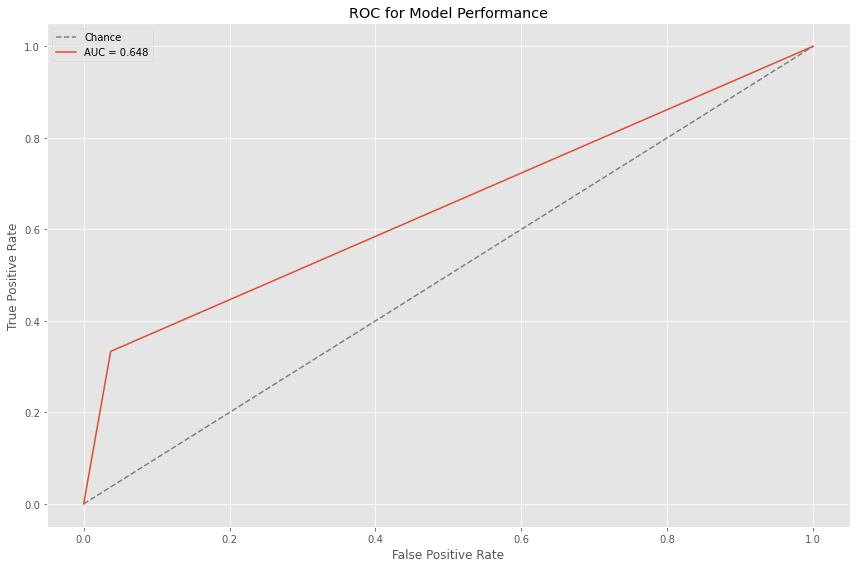

In [25]:
print("\nThe grey line represents a random guess.")
plot_roc(y_test,predictions)

## Logistic Regression Attempt

In [16]:
# Instatiating 
logReg = LogisticRegression()

# Fitting the model
logReg.fit(X_train, y_train)

# Predicting and Making a classification report
predictions = logReg.predict(X_test)

# Making the classification report
print('Classification Report:')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.93      0.78        27
           1       0.60      0.20      0.30        15

    accuracy                           0.67        42
   macro avg       0.64      0.56      0.54        42
weighted avg       0.65      0.67      0.61        42



Confusion Matrix:
[[25  2]
 [12  3]]



The grey line represents a random guess.


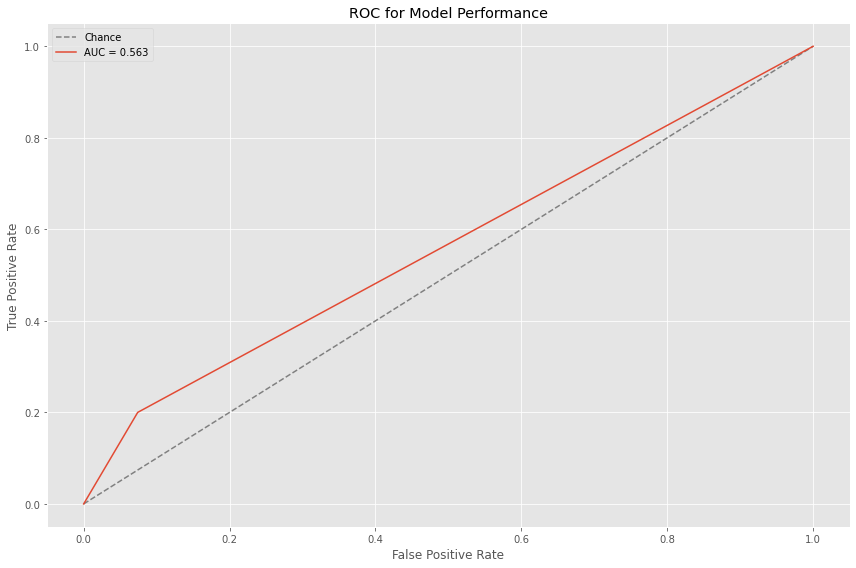

In [17]:
print("\nThe grey line represents a random guess.")
plot_roc(y_test,predictions)